In [30]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
# Display all of the columns
pd.set_option('display.max_columns', None)

In [31]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_time.db'
# Download the database file
r = requests.get(url)
with open('claimed_time.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_time.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [32]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [33]:
# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
#df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'] * 3600
#df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'].apply(lambda x: x * 3600)

# Fill NaN values in Assembly_EstTotalHours_ThisLaborGroup with 0
df['Assembly_EstTotalHours_ThisLaborGroup'].fillna(0, inplace=True)

# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'] * 3600

df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328,0.0,0.0
11228,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782,0.0,0.0
11229,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133,0.0,0.0
11230,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92,0.0,0.0


In [34]:
#df.dtypes
df['Assembly_EstTotalSeconds_ThisLaborGroup'].unique()

array([    0.     ,  6098.46   , 10474.86   , ...,  2792.673  ,
        2043.96525,   803.72025])

In [35]:
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalSeconds_ThisLaborGroup'].replace(0., np.nan)
df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,NaN
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,NaN
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328,0.0,NaN
11228,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782,0.0,NaN
11229,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133,0.0,NaN
11230,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92,0.0,NaN


In [36]:
# Drop columns with null values in the column Assembly_EstTotalHours_ThisLaborGroup
#df_drop = df.dropna(axis='columns', subset=['Assembly_EstTotalHours_ThisLaborGroup'])
df_drop = df.dropna(subset=['Assembly_EstTotalSeconds_ThisLaborGroup'])
df_drop

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
816,22-130,637120,B456,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,62,1.694017,6098.460000
817,22-130,637120,B456,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2525,2.909683,10474.860000
818,22-130,637120,B456,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,99,1.694017,6098.460000
819,22-130,637120,B456,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2620,2.909683,10474.860000
820,22-130,637120,B456,3,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,14,1.694017,6098.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,24-011,837518,B107,38,CHANNEL,12.00,261.570,40.31,C,6 x 10.5,N - No Paint,45,11,Weld,1649,0.099224,357.207843
9896,24-011,837518,B107,39,CHANNEL,12.00,261.570,40.31,C,6 x 10.5,N - No Paint,45,11,Weld,4,0.049612,178.603922
9907,24-011,868657,B109,1,CHANNEL,11.08,125.442,26.59,C,4 x 5.4,N - No Paint,8,10,Fab/Layout,2310,0.775743,2792.673000
9908,24-011,868657,B109,1,CHANNEL,11.08,125.442,26.59,C,4 x 5.4,N - No Paint,8,10,Material Handling,241,0.567768,2043.965250


In [37]:
df_reduce =df_drop.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'NumberWithDash'], inplace=False)
df_reduce.head(30)

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup
816,637120,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,62,6098.460
817,637120,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2525,10474.860
818,637120,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,99,6098.460
819,637120,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2620,10474.860
820,637120,3,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,14,6098.460
821,637120,3,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2614,10474.860
822,637131,1,BEAM,23.08,633.943,101.31,W,12 x 26,"DS - Special Case/Steel, Paint All",1,8,Material Handling,95,24469.200
823,637131,1,BEAM,23.08,633.943,101.31,W,12 x 26,"DS - Special Case/Steel, Paint All",1,8,Peddi Assembler,2322,7328.304
824,637137,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",1,18,Material Handling,20,6098.652
825,637137,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",1,18,Peddi Assembler,2589,10475.028


In [38]:
df_reduce.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPieceProductionCode', 'Assembly_MainPartLengthFt',
       'Assembly_WeightEachLbs', 'Assembly_SurfaceAreaEachSqFt',
       'Assembly_MainPartShape', 'Assembly_MainPartDimension',
       'Assembly_MainPartFinishDescr', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'EPM_AdjustedStationName',
       'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup'],
      dtype='object')

In [39]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID                1176
EPM_InstanceNumber                          141
Assembly_MainPieceProductionCode             24
Assembly_MainPartLengthFt                   651
Assembly_WeightEachLbs                     1035
Assembly_SurfaceAreaEachSqFt               1008
Assembly_MainPartShape                       13
Assembly_MainPartDimension                  208
Assembly_MainPartFinishDescr                 12
Assembly_TotalQuantityInJob                  31
Assembly_NumSmallParts                       75
EPM_AdjustedStationName                       7
TimeInSeconds_ThisWorkSegment              2067
Assembly_EstTotalSeconds_ThisLaborGroup    2764
dtype: int64


In [40]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AL,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_FB,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_W,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 11 3/8 §,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 13 13/16 §,Assembly_MainPartDimension_1/4 x 14,Assembly_MainPartDimension_1/4 x 14 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 16 1/4 §,Assembly_MainPartDimension_1/4 x 16 7/16 §,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPartDimension_1/4 x 2,Assembly_MainPartDimension_1/4 x 20 7/16 §,Assembly_MainPartDimension_1/4 x 25,Assembly_MainPartDimension_1/4 x 27 §,Assembly_MainPartDimension_1/4 x 6,Assembly_MainPartDimension_1/4 x 6 §,Assembly_MainPartDimension_1/4 x 6 3/4,Assembly_MainPartDimension_1/4 x 9 1/2,Assembly_MainPartDimension_10 3/4 x 0.25,Assembly_MainPartDimension_10 x 10 x 0.375,Assembly_MainPartDimension_10 x 10 x 0.5,Assembly_MainPartDimension_10 x 10 x 0.75,Assembly_MainPartDimension_10 x 100,Assembly_MainPartDimension_10 x 12,Assembly_MainPartDimension_10 x 15.3,Assembly_MainPartDimension_10 x 33,Assembly_MainPartDimension_10 x 39,Assembly_MainPartDimension_10 x 4 x 0.375,Assembly_MainPartDimension_10 x 45,Assembly_MainPartDimension_10 x 49,Assembly_MainPartDimension_10 x 5 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.5,Assembly_MainPartDimension_10 x 77,Assembly_MainPartDimension_11ga x 42 3/8,Assembly_MainPartDimension_11ga x 52 3/16,Assembly_MainPartDimension_11ga x 55 7/16,Assembly_MainPartDimension_11ga x 56 1/4,Assembly_MainPartDimension_11ga x 56 5/16,Assembly_MainPartDimension_11ga x 56 7/8,Assembly_MainPartDimension_12 3/4 x 0.25,Assembly_MainPartDimension_12 x 14.3,Assembly_MainPartDimension_12 x 170,Assembly_MainPartDimension_12 x 20.7,Assembly_MainPartDimension_12 x 22,Assembly_MainPartDimension_12 x 26,Assembly_MainPartDimension_12 x 35,Assembly_MainPartDimension_12 x 4 x 0.25,Assembly_MainPartDimension_12 x 40,Assembly_MainPartDimension_12 x 53,Assemb

In [41]:
df_reduce_encoded.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup',
       'Assembly_MainPieceProductionCode_ALUM EMBED ANGLE',
       ...
       'Assembly_MainPartFinishDescr_N - No Paint',
       'Assembly_MainPartFinishDescr_S - Special Case',
       'Assembly_MainPartFinishDescr_T - Coal Tar For Aluminum',
       'EPM_AdjustedStationName_Beam Cambering', 'EPM_AdjustedStationName_Cut',
       'EPM_AdjustedStationName_Fab/Layout',
       'EPM_AdjustedStationName_Material Handling',
       'EPM_AdjustedStationName_Paint',
       'EPM_AdjustedStationName_Peddi Assembler',
       'EPM_AdjustedStationName_Weld'],
      dtype='object', length=273)

In [42]:
X = df_reduce_encoded.copy()
X.drop("Assembly_SurfaceAreaEachSqFt", axis=1, inplace=True)
X.head()

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AL,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_FB,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_W,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 11 3/8 §,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 13 13/16 §,Assembly_MainPartDimension_1/4 x 14,Assembly_MainPartDimension_1/4 x 14 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 16 1/4 §,Assembly_MainPartDimension_1/4 x 16 7/16 §,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPartDimension_1/4 x 2,Assembly_MainPartDimension_1/4 x 20 7/16 §,Assembly_MainPartDimension_1/4 x 25,Assembly_MainPartDimension_1/4 x 27 §,Assembly_MainPartDimension_1/4 x 6,Assembly_MainPartDimension_1/4 x 6 §,Assembly_MainPartDimension_1/4 x 6 3/4,Assembly_MainPartDimension_1/4 x 9 1/2,Assembly_MainPartDimension_10 3/4 x 0.25,Assembly_MainPartDimension_10 x 10 x 0.375,Assembly_MainPartDimension_10 x 10 x 0.5,Assembly_MainPartDimension_10 x 10 x 0.75,Assembly_MainPartDimension_10 x 100,Assembly_MainPartDimension_10 x 12,Assembly_MainPartDimension_10 x 15.3,Assembly_MainPartDimension_10 x 33,Assembly_MainPartDimension_10 x 39,Assembly_MainPartDimension_10 x 4 x 0.375,Assembly_MainPartDimension_10 x 45,Assembly_MainPartDimension_10 x 49,Assembly_MainPartDimension_10 x 5 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.5,Assembly_MainPartDimension_10 x 77,Assembly_MainPartDimension_11ga x 42 3/8,Assembly_MainPartDimension_11ga x 52 3/16,Assembly_MainPartDimension_11ga x 55 7/16,Assembly_MainPartDimension_11ga x 56 1/4,Assembly_MainPartDimension_11ga x 56 5/16,Assembly_MainPartDimension_11ga x 56 7/8,Assembly_MainPartDimension_12 3/4 x 0.25,Assembly_MainPartDimension_12 x 14.3,Assembly_MainPartDimension_12 x 170,Assembly_MainPartDimension_12 x 20.7,Assembly_MainPartDimension_12 x 22,Assembly_MainPartDimension_12 x 26,Assembly_MainPartDimension_12 x 35,Assembly_MainPartDimension_12 x 4 x 0.25,Assembly_MainPartDimension_12 x 40,Assembly_MainPartDimension_12 x 53,Assembly_MainPartDimension_12 x 58,

In [43]:
y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment'].ravel()
y[:5]

array([  62, 2525,   99, 2620,   14], dtype=int64)

In [44]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (3921, 272)
Targe Shape: (3921,)


In [45]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [47]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

In [48]:
X_scaler

StandardScaler()

In [49]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X_test_scaled

array([[ 1.75877566, -0.18115964, -1.32546069, ..., -0.01844592,
        -0.19054122,  1.64827612],
       [-0.6887356 , -0.241786  ,  1.09359337, ..., -0.01844592,
        -0.19054122, -0.60669447],
       [ 0.54038517, -0.24852226, -0.16669772, ..., -0.01844592,
        -0.19054122, -0.60669447],
       ...,
       [-0.66099707, -0.24852226, -0.50064968, ..., -0.01844592,
        -0.19054122, -0.60669447],
       [ 1.76194259, -0.12726954, -1.1316343 , ..., -0.01844592,
        -0.19054122,  1.64827612],
       [-0.66449931, -0.24852226, -1.23735779, ..., -0.01844592,
        -0.19054122, -0.60669447]])

# Fitting the Random Forest Model

In [51]:
# Instantiate the Random Forest Regression model
rf_reg = RandomForestRegressor()

In [52]:
# Fit the model to the training data
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [53]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

In [54]:
# Evaluate the model
print("Random Forest Regression Model Score (R^2):", rf_reg.score(X_test_scaled, y_test))
print("Random Forest Regression Mean Absolute Error:", np.mean(np.abs(y_pred_rf - y_test)))

Random Forest Regression Model Score (R^2): 0.8031324610624317
Random Forest Regression Mean Absolute Error: 408.93603465851174


In [55]:
# Display feature importances
feature_importances = rf_reg.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

Feature Importances:
EPM_ProductionControlItemID: 0.006540316694257049
EPM_InstanceNumber: 1.2971271074479074e-06
Assembly_MainPartLengthFt: 7.473613348330199e-05
Assembly_WeightEachLbs: 0.0014520031273222642
Assembly_TotalQuantityInJob: 3.026161389390876e-06
Assembly_NumSmallParts: 0.0001028708484489505
TimeInSeconds_ThisWorkSegment: 0.7789706778955299
Assembly_EstTotalSeconds_ThisLaborGroup: 0.2092164732775277
Assembly_MainPieceProductionCode_ALUM EMBED ANGLE: 1.2449954399724286e-11
Assembly_MainPieceProductionCode_ALUM PIPE: 2.0313705570747962e-11
Assembly_MainPieceProductionCode_ALUM PLATE: 7.870886908080942e-10
Assembly_MainPieceProductionCode_ALUM STRINGER: 1.169815052088848e-12
Assembly_MainPieceProductionCode_ANGLE: 2.818693451627381e-10
Assembly_MainPieceProductionCode_BEAM: 6.0557834319666326e-06
Assembly_MainPieceProductionCode_BENT PLATE: 1.0498032718109663e-09
Assembly_MainPieceProductionCode_BOLLARD: 7.671842656351891e-12
Assembly_MainPieceProductionCode_CHANNEL: 7.290658

In [78]:
# Create a DataFrame with feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Exclude 'TimeInSeconds_ThisWorkSegment' and 'Assembly_EstTotalSeconds_ThisLaborGroup'
top_twelve_features = feature_importance_df[(feature_importance_df['Feature'] != 'TimeInSeconds_ThisWorkSegment') & 
                                            (feature_importance_df['Feature'] != 'Assembly_EstTotalSeconds_ThisLaborGroup')]

# Sort the DataFrame by importance and select top 12 features
top_twelve_features = top_twelve_features.nlargest(12, 'Importance')

# Plot top twelve features
top_twelve_features.hvplot.barh(x='Feature', y='Importance', title='Top Twelve Features by Importance', rot=0, color='blue', legend=False, width=900, height=400)


:Bars   [Feature]   (Importance)

# Predict and Plot

In [57]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf, 'Assembly_EstTotalSeconds_ThisLaborGroup': X_test['Assembly_EstTotalSeconds_ThisLaborGroup'],})

# Add another column
predictions['Actual to Predicted Difference'] = predictions['Actual'] - predictions['Predicted']
predictions['Est to Predicted Difference'] = predictions['Assembly_EstTotalSeconds_ThisLaborGroup'] - predictions['Predicted']

predictions.head(15)

,Actual,Predicted,Assembly_EstTotalSeconds_ThisLaborGroup,Actual to Predicted Difference,Est to Predicted Difference
2877,393,392.85,346.9680,0.15,-45.8820
3588,26,26.07,42232.8240,-0.07,42206.7540
9518,3209,3213.37,22272.4080,-4.37,19059.0380
9052,5,5.00,31087.4400,0.00,31082.4400
4432,4456,4445.46,4169.3220,10.54,-276.1380
6094,583,586.17,23137.3440,-3.17,22551.1740
1691,120,120.07,2049.1920,-0.07,1929.1220
4409,3,3.00,609.4944,0.00,606.4944
9654,13582,13604.59,16467.0480,-22.59,2862.4580
7060,7727,7735.25,11051.1000,-8.25,3315.8500


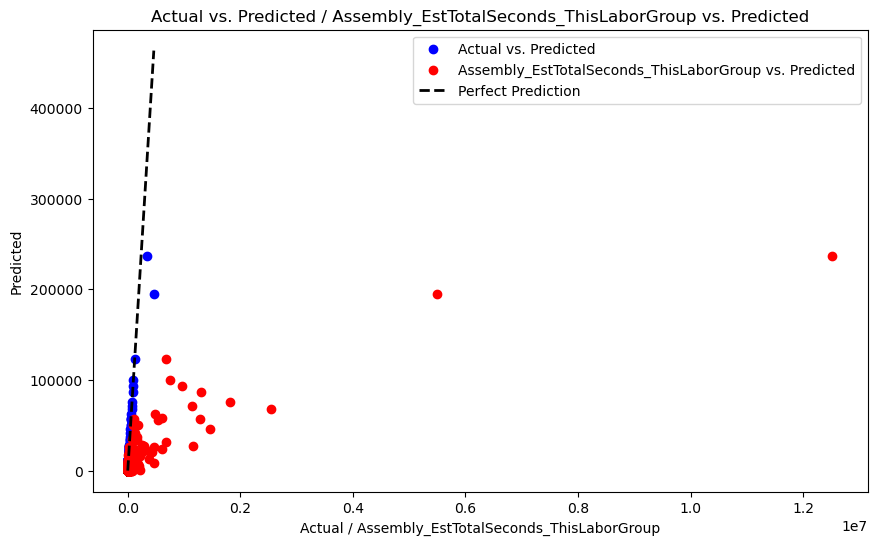

In [58]:
# Plot actual vs. predicted values and Assembly_EstTotalHours_ThisLaborGroup vs. predicted values
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs. Predicted')

# Plot Assembly_EstTotalHours_ThisLaborGroup vs. predicted values
plt.scatter(X_test['Assembly_EstTotalSeconds_ThisLaborGroup'], y_pred_rf, color='red', label='Assembly_EstTotalSeconds_ThisLaborGroup vs. Predicted')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual / Assembly_EstTotalSeconds_ThisLaborGroup')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted / Assembly_EstTotalSeconds_ThisLaborGroup vs. Predicted')
plt.legend()
plt.show()

In [59]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
predictions.head()

,Actual,Predicted
0,393,392.85
1,26,26.07
2,3209,3213.37
3,5,5.00
4,4456,4445.46


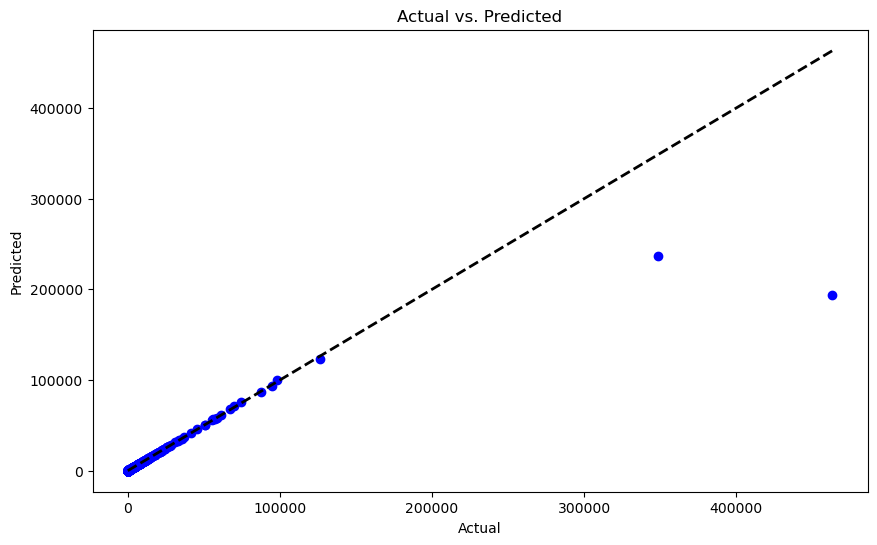

In [60]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Model Score (R^2):", r2)
print("Random Forest Regression Mean Absolute Error:", mae)

Random Forest Regression Model Score (R^2): 0.8031324610624317
Random Forest Regression Mean Absolute Error: 408.93603465851174


# Random Forest Classifer

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [63]:
# Convert TimeInSeconds_ThisWorkSegment to categorical variable
y_class = pd.qcut(df_reduce_encoded['TimeInSeconds_ThisWorkSegment'], q=5, labels=[1, 2, 3, 4, 5])

In [64]:
# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [65]:
# Scale the features
scaler_class = StandardScaler()
X_train_scaled_class = scaler_class.fit_transform(X_train_class)
X_test_scaled_class = scaler_class.transform(X_test_class)

In [66]:
# Instantiate the Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=500, random_state=78)

In [67]:
# Fit the model to the training data
rf_clf.fit(X_train_scaled_class, y_train_class)

RandomForestClassifier(n_estimators=500, random_state=78)

In [68]:
# Predict the target values for the test set
y_pred_rf_class = rf_clf.predict(X_test_scaled_class)

In [69]:
# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_rf_class)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.9057324840764331


# Model Evaluation

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

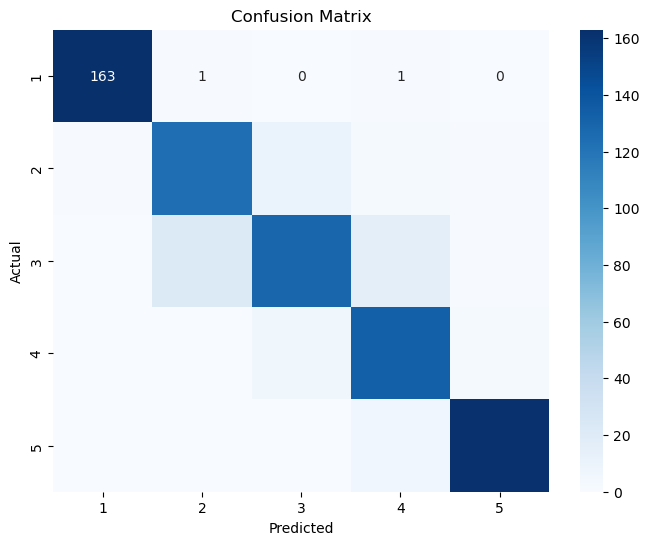

In [71]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_rf_class)

# Define labels for the confusion matrix
labels = [1, 2, 3, 4, 5]

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# Display results
print("Confusion Matrix:")
display(cm_df)
acc_score = accuracy_score(y_test_class, y_pred_rf_class)
print(f"Accuracy Score:{acc_score}")
print("Classification Report")
print(classification_report(y_test_class, y_pred_rf_class))

Confusion Matrix:


,1,2,3,4,5
1,163,1,0,1,0
2,1,124,11,3,1
3,0,22,129,17,1
4,0,0,7,133,3
5,0,0,0,6,162


Accuracy Score:0.9057324840764331
Classification Report
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       165
           2       0.84      0.89      0.86       140
           3       0.88      0.76      0.82       169
           4       0.83      0.93      0.88       143
           5       0.97      0.96      0.97       168

    accuracy                           0.91       785
   macro avg       0.90      0.91      0.90       785
weighted avg       0.91      0.91      0.91       785



In [73]:
# Calculate feature importances
feature_importances = rf_clf.feature_importances_

# Sort features by importance
sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True)

[(0.36520263930185154, 'TimeInSeconds_ThisWorkSegment'),
 (0.0986254073853811, 'EPM_AdjustedStationName_Material Handling'),
 (0.09690965949439137, 'Assembly_EstTotalSeconds_ThisLaborGroup'),
 (0.048054187253802935, 'Assembly_WeightEachLbs'),
 (0.044755799492132396, 'EPM_ProductionControlItemID'),
 (0.04276547517696444, 'Assembly_NumSmallParts'),
 (0.04141305571186818, 'Assembly_MainPartLengthFt'),
 (0.03229824964074557, 'EPM_AdjustedStationName_Fab/Layout'),
 (0.03131266055882889, 'EPM_AdjustedStationName_Weld'),
 (0.031108184772933936, 'EPM_InstanceNumber'),
 (0.01825795229070468, 'Assembly_TotalQuantityInJob'),
 (0.006869014573848668, 'EPM_AdjustedStationName_Peddi Assembler'),
 (0.005222900339164831, 'Assembly_MainPartFinishDescr_D - Steel, Paint All'),
 (0.0046453478382456675, 'Assembly_MainPartShape_L'),
 (0.004548053571560635, 'Assembly_MainPieceProductionCode_ANGLE'),
 (0.00407770418101444, 'Assembly_MainPartFinishDescr_N - No Paint'),
 (0.003969881616710798, 'Assembly_MainPart

<Figure size 1000x600 with 0 Axes>

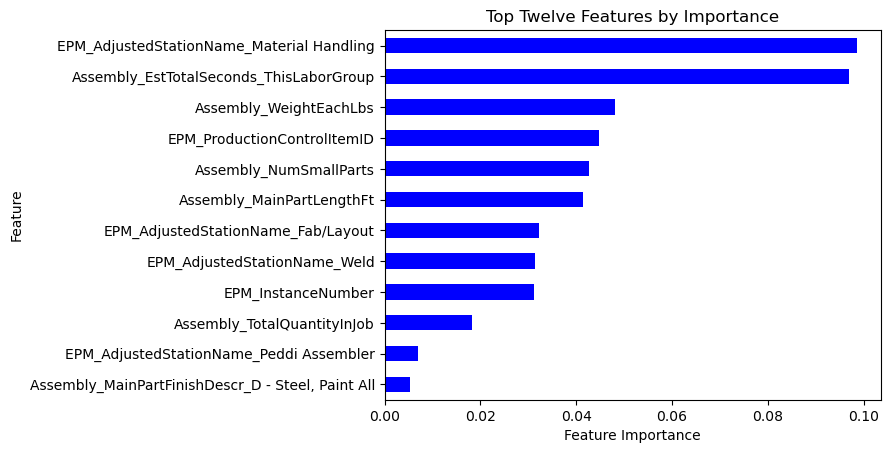

In [74]:
plt.figure(figsize=(10, 6))
# Exclude TimeInSeconds_ThisWorkSegment feature
feature_importance_df = pd.DataFrame(sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True))
feature_importance_df.set_index(feature_importance_df[1], inplace=True)
feature_importance_df.drop(columns=1, inplace=True)
feature_importance_df.rename(columns={0:'Feature Importances'}, inplace=True)
feature_importance_sorted = feature_importance_df.sort_values(by='Feature Importances')
top_twelve_features = feature_importance_sorted[:-1].tail(12)  # Excluding TimeInSeconds_ThisWorkSegment and selecting the top twelve features
top_twelve_features.plot(kind='barh', color='blue', title='Top Twelve Features by Importance', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()